# Importing necessary libraries

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve,auc
from sklearn.calibration import calibration_curve
import import_ipynb
from DataPreProcessing import new_df,X,y,X_train, X_test, y_train,y_test,sc

# Separate the dataset into non-fraudulent and fraudulent transactions

In [36]:
non_fraud = new_df[new_df['isFraud'] == 0]
fraud = new_df[new_df['isFraud'] == 1]

# Display the shapes of the non-fraudulent and fraudulent datasets

In [37]:
non_fraud.shape, fraud.shape

((6354407, 5), (8213, 5))

# Randomly sample the non-fraudulent dataset to match the size of the fraudulent dataset

In [38]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(8213, 5)

#  Combine fraud and non-fraud datasets to create a balanced dataset

In [39]:
data = pd.concat([fraud, non_fraud], ignore_index=True)

In [40]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,4,181.00,181.0,0.00,1
1,2,181.00,181.0,0.00,1
2,4,2806.00,2806.0,0.00,1
3,2,2806.00,2806.0,0.00,1
4,4,20128.00,20128.0,0.00,1
...,...,...,...,...,...
16421,3,163258.96,12788913.1,12952172.07,0
16422,2,482510.53,0.0,0.00,0
16423,1,6090.94,22262.0,16171.06,0
16424,2,214411.51,17125.0,0.00,0


# Count the number of fraudulent (1) and non-fraudulent (0) transactions in the combined dataset


In [41]:
data['isFraud'].value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

# Convert y_train and y_test to numpy arrays


In [42]:
y_train = np.array(y_train)
y_test = np.array(y_test)

 # Reshape X_train and X_test to include a third dimension for compatibility with convolutional neural networks


In [43]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Display the new shapes of X_train and X_test after reshaping


In [44]:
X_train.shape, X_test.shape


((4771965, 4, 1), (1590655, 4, 1))

# Defining the architecture of a Convolutional Neural Network (CNN) 

In [45]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2, activation= 'relu', input_shape = X_train[0].shape)) 
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

c:\Users\s2300\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Display a summary of the model architecture, including layer types, output shapes, and number of parameters


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 3, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 2, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,961 (50.63 KB)

 Trainable params: 12,769 (49.88 KB)

 Non-trainable params: 192 (768.00 B)

# Compile the Model

In [47]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])


# Train the Model

In [48]:
model_training_results = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test,y_test), verbose=1)

Epoch 1/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 290s 2ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 2/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 278s 2ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 3/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 277s 2ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 4/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 279s 2ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 5/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 280s 2ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0024
Epoch 6/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 283s 2ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 7/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 284s 2ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 8/20
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 28

# To Check if the model is overfitting or underfitting

In [49]:
y_train_pred_cnn = model.predict(X_train)
y_val_pred_cnn = model.predict(X_test)

# Convert predictions to binary format (0 or 1)
y_train_pred_cnn_binary = np.where(y_train_pred_cnn > 0.5, 1, 0)
y_test_pred_cnn_binary = np.where(y_val_pred_cnn > 0.5, 1, 0)

# Calculate accuracy scores
train_accuracy_cnn = accuracy_score(y_train, y_train_pred_cnn_binary)
val_accuracy_cnn = accuracy_score(y_test, y_test_pred_cnn_binary)

149124/149124 ━━━━━━━━━━━━━━━━━━━━ 142s 951us/step
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 48s 969us/step


In [50]:
train_accuracy = round(train_accuracy_cnn)
val_accuracy = round(val_accuracy_cnn)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)


Training Accuracy: 1
Validation Accuracy: 1


In [51]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")


The model's performance on training and validation sets are similar


# Predicting a new result

In [52]:
 
input_data = np.array([[4,181.00, 181.00,0.00]])

 
# Adjust the input shape according to your model's requirements
input_data_reshaped = input_data.reshape((1, input_data.shape[1], 1))  # (batch_size, sequence_length, num_features)

# Make predictions using the reshaped input data
predictions = model.predict(input_data_reshaped)

# Print the predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.]]


In [53]:
 
input_data = np.array([[1,9839.64, 170136.0,160296.36]])

 
# Adjust the input shape according to your model's requirements
input_data_reshaped = input_data.reshape((1, input_data.shape[1], 1))  # (batch_size, sequence_length, num_features)

# Make predictions using the reshaped input data
predictions = model.predict(input_data_reshaped)

# Print the predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]


# Prediciting the test set results

In [54]:
y_pred = model.predict(X_test)

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step


In [55]:
threshold = 0.5   #A threshold of 0.5 is often chosen when there is no specific preference for precision or recall. 
                  #It provides a balanced trade-off between the two metrics.
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Accuracy

In [56]:
accuracy = accuracy_score(y_test,y_pred_binary)
round(accuracy*100,2)

99.92

# Classification Report

In [57]:
print(classification_report(y_test, y_pred_binary))

'''
0- No Fraud
1- Fraud
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.88      0.40      0.55      2027

    accuracy                           1.00   1590655
   macro avg       0.94      0.70      0.77   1590655
weighted avg       1.00      1.00      1.00   1590655



'\n0- No Fraud\n1- Fraud\n'

# ROC Curve

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 44s 878us/step


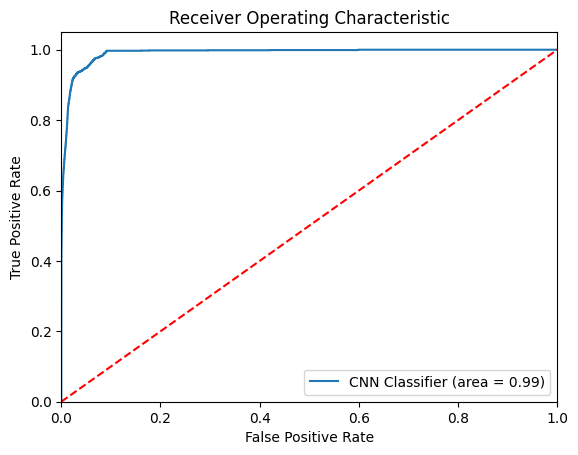

In [58]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Calculate ROC AUC score
ann_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='CNN Classifier (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall Curve

149124/149124 ━━━━━━━━━━━━━━━━━━━━ 139s 929us/step


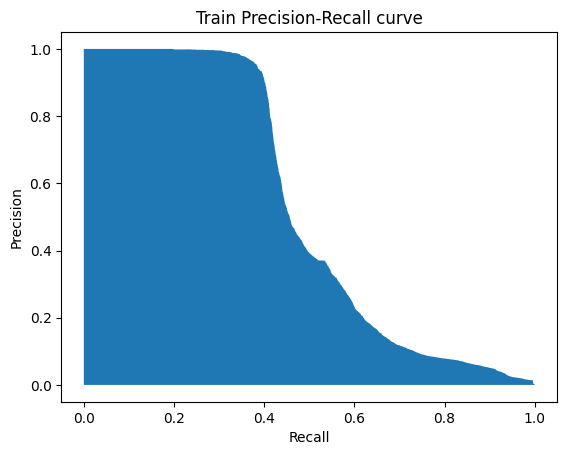

AUC-PRC: 0.523093838640085


In [59]:
y_prob_train_ann = model.predict(X_train)

# Calculate precision-recall curve
precision_ann, recall_ann, _ = precision_recall_curve(y_train, y_prob_train_ann)

# Plot precision-recall curve
plt.fill_between(recall_ann, precision_ann)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.show()
from sklearn.metrics import precision_recall_curve, auc
auc_prc = auc(recall_ann, precision_ann)
print("AUC-PRC:", auc_prc)

# Confusion Matrix

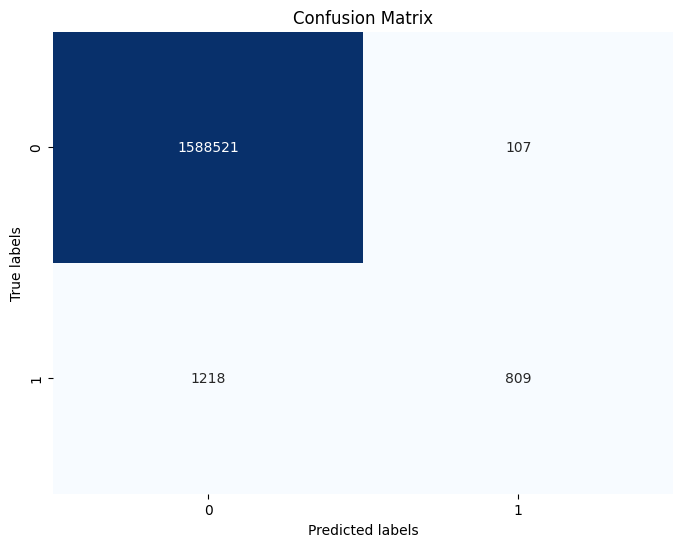

In [60]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Calibration Curve

149124/149124 ━━━━━━━━━━━━━━━━━━━━ 132s 887us/step


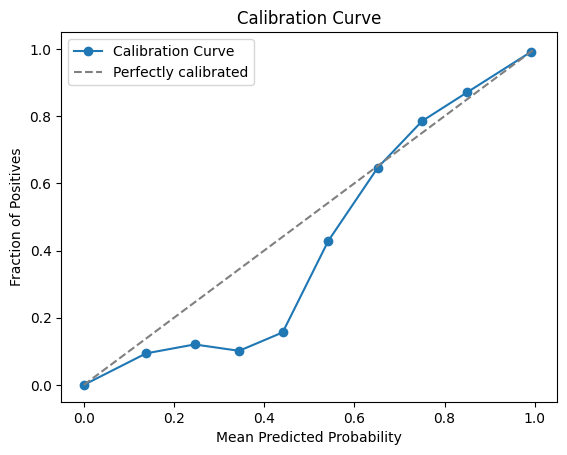

In [61]:
# Get predicted probabilities for the training set
y_prob_train_ann = model.predict(X_train)

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_train, y_prob_train_ann, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
